<a href="https://colab.research.google.com/github/joshfpedro/math-328/blob/main/numerical_calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Calculus

## Numerical Differentiation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def approx_derivative(f, x, h=1e-5):

    # Backward Difference
    backward_diff = (f(x) - f(x - h)) / h

    # Forward Difference
    forward_diff = (f(x + h) - f(x)) / h

    # Central Difference
    central_diff = (f(x + h) - f(x - h)) / (2 * h)

    return backward_diff, forward_diff, central_diff

# Example
def example_function(x):
    return np.sin(x)

x_value = 2

backward, forward, central = approx_derivative(example_function, x_value, h=1e-10)

print("Backward Difference:", backward)
print("Forward Difference:", forward)
print("Central Difference:", central)
print("Exact Derivative:", np.cos(x_value))

Backward Difference: -0.4161471167662967
Forward Difference: -0.4161471167662967
Central Difference: -0.4161471167662967
Exact Derivative: -0.4161468365471424


In [3]:
def derivative(f, x, h=1e-5, method='central'):
    """Compute numerical derivative of f at x."""

    if method == 'central':
        return (f(x + h) - f(x - h)) / (2 * h)

    elif method == 'forward':
        return (f(x + h) - f(x)) / h

    elif method == 'backward':
        return (f(x) - f(x - h)) / h

    elif method == 'complex':
        return f(x + 1j * h).imag / h

    else:
        raise ValueError("Method must be 'central', 'forward', 'backward', or 'complex'.")

derivative(example_function, x_value, h=1e-16, method='complex')

np.float64(-0.4161468365471424)

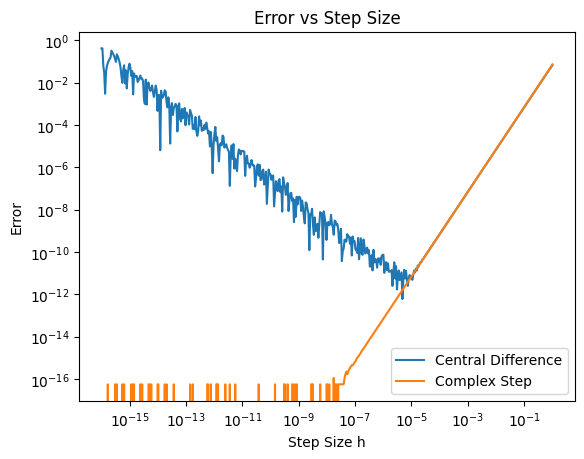

In [4]:
# Define functions
def complex_step(f, x, h): return np.imag(f(x + 1j*h)) / h
def central_diff(f, x, h): return (f(x + h) - f(x - h)) / (2 * h)

# Setup
f = np.sin; x = 2.0; true_val = np.cos(2)
h_vals = np.logspace(-16, 0, 500)
complex_errs = []; central_errs = []

# Compute Errors
for h in h_vals:
    complex_errs.append(abs(complex_step(f, x, h) - true_val))
    central_errs.append(abs(central_diff(f, x, h) - true_val))

# Plotting (Matplotlib)
plt.loglog(h_vals, central_errs, label='Central Difference')
plt.loglog(h_vals, complex_errs, label='Complex Step')
plt.title('Error vs Step Size')
plt.xlabel('Step Size h'); plt.ylabel('Error')
plt.legend()
plt.show()

## Numerical Integration

### Trapezoid Rule

In [5]:
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (h/2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

In [6]:
# Example
a = 0
b = np.pi
n = 4
f = lambda x: np.sin(x)

trapezoidal_rule(f, a, b, n)

np.float64(1.8961188979370398)

In [7]:
# Compare with exact definite integral of sin(x) between 0 and pi
-np.cos(np.pi) - (- np.cos(0))

np.float64(2.0)

Approximate Area: 1.9835235375094546
Exact Area: 2.0
Error: 0.01647646249054535


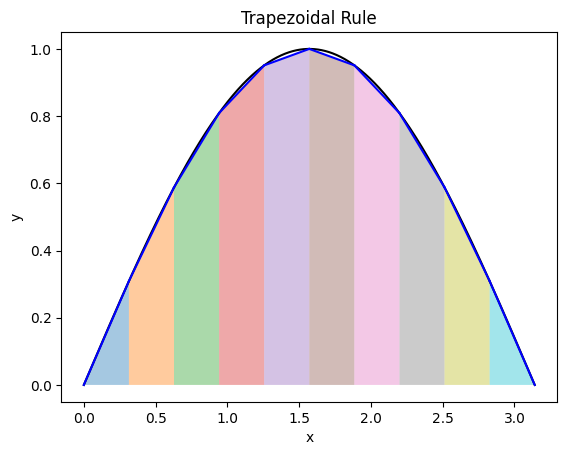

In [8]:
# Example
a = 0
b = np.pi
n = 10
f = lambda x: np.sin(x)

exact_area = -np.cos(np.pi) - (- np.cos(0))

print("Approximate Area:", trapezoidal_rule(f, a, b, n))
print("Exact Area:", exact_area)
print("Error:", abs(trapezoidal_rule(f, a, b, n) - exact_area))

# Setup
x = np.linspace(a, b, n+1)
y = f(x)

x_fine = np.linspace(a, b, 1000)
y_fine = f(x_fine)

# Plot Function
plt.plot(x_fine, y_fine, 'k-', label='Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Trapezoidal Rule')

# Plot Trapezoids
for i in range(n):
    # Fill polygon defined by 4 points: (x_i, 0), (x_i, y_i), (x_i+1, y_i+1), (x_i+1, 0)
    plt.fill_between([x[i], x[i+1]], [y[i], y[i+1]], alpha=0.4)

    # Draw top line
    plt.plot([x[i], x[i+1]], [y[i], y[i+1]], 'b-')

## Simpson's Rule

In [9]:
def simpsons_rule(f, a, b, n):
    if n % 2 != 0: raise ValueError("n must be even")
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)

    # Pattern: 1, 4, 2, 4, ..., 2, 4, 1
    return (h/3) * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]) + y[-1])

simpsons_area = simpsons_rule(f, a, b, n)

error_simpsons = simpsons_area - exact_area
error_simpsons

np.float64(0.00010951731500430384)

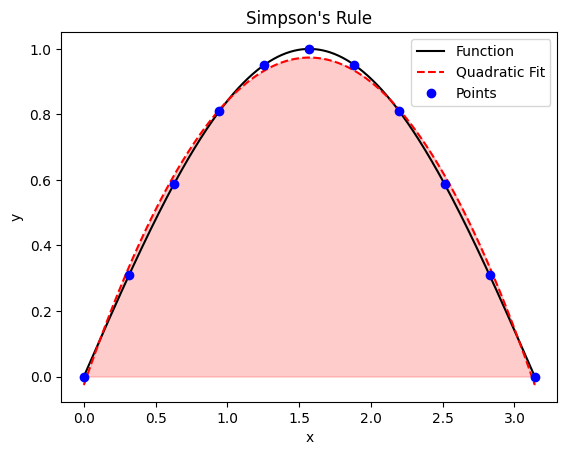

In [10]:
# Setup
x = np.linspace(a, b, n+1)
y = f(x)

# Fit and Plot Parabola for each pair of intervals
# Note: Simpson's uses 3 points (2 intervals) per parabola
poly = np.polyfit(x, y, 2) # Fit quadratic
y_poly = np.polyval(poly, x_fine)

plt.plot(x_fine, y_fine, 'k-', label='Function')
plt.plot(x_fine, y_poly, 'r--', label='Quadratic Fit')
plt.fill_between(x_fine, y_poly, alpha=0.2, color='red')
plt.plot(x, y, 'bo', label='Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Simpson\'s Rule')
plt.legend()
plt.show()

## Monte Carlo Integration

In [11]:
def monte_carlo_integrate(f, a, b, N=1000):
    x_rand = np.random.uniform(a, b, N)
    y_rand = f(x_rand)

    # Integral = (b-a) * Average Height
    return (b - a) * np.mean(y_rand)

monte_carlo_integrate(f, a, b, 1000000)

np.float64(2.0007714405841637)

### Example: Estimating $\pi$ using Monte Carlo integration

In [12]:
np.random.uniform(-1, 1, 10)

array([ 0.09807751, -0.15113751, -0.51474131,  0.11091035, -0.02079936,
        0.47231185, -0.10922475,  0.40068461,  0.97671294,  0.28049714])

In [13]:
def estimate_pi(N=10000):
    # 1. Throw N darts
    x = np.random.uniform(-1, 1, N)
    y = np.random.uniform(-1, 1, N)

    # 2. Check if inside circle
    # Vectorized boolean array
    inside = (x**2 + y**2) <= 1

    # 3. Count hits
    hits = np.sum(inside)

    # 4. Estimate Pi
    pi_est = 4 * (hits / N)
    return pi_est, x, y, inside

pi_val, x, y, inside = estimate_pi(5000)
print(f"Estimated Pi: {pi_val}")

Estimated Pi: 3.1184


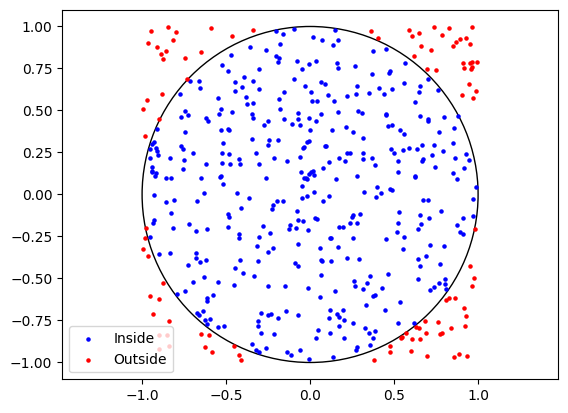

In [14]:
N = 500

# Generate Data
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
inside = x**2 + y**2 <= 1

# Plot Circle
circle = plt.Circle((0, 0), 1, fill=False)
plt.gca().add_patch(circle)

# Plot Points
plt.scatter(x[inside], y[inside], s=5, c='blue', label='Inside')
plt.scatter(x[~inside], y[~inside], s=5, c='red', label='Outside')

plt.axis('equal')
plt.legend()

plt.show()

## Optimization

### Gradient Descent

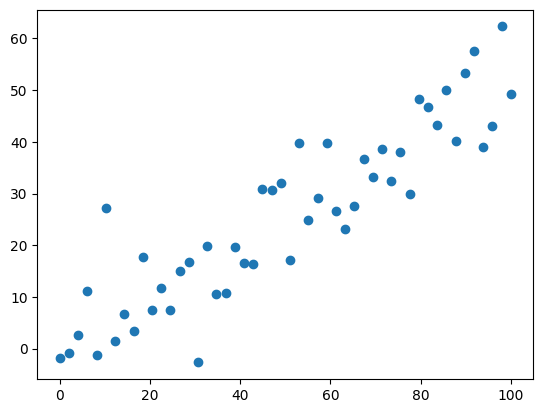

In [15]:
x_data = np.linspace(0, 100, 50)
y_data =  0.5 * x_data + 1 + np.random.normal(0, 8, len(x_data))

plt.scatter(x_data, y_data)
plt.show()

In [47]:
def linear_regression_gd(X, y, learning_rate=0.01, n_iters=1000):
    n = len(X)
    m, b = np.random.normal(0, 1, 2)  # Initial guess

    cost_history = []
    param_history = [(m, b)]

    for i in range(n_iters):
        y_pred = m * X + b

        # Cost Function
        cost = np.mean((y - y_pred)**2)
        print(f"Iteration: {i} Cost: {cost}")
        cost_history.append(cost)

        # Calculate Gradients
        dm = (-2/n) * np.sum(X * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)

        # Update Parameters
        m -= learning_rate * dm
        b -= learning_rate * db
        param_history.append((m, b))


    return m, b, cost_history, param_history

In [78]:
m, b, cost_history, param_history = linear_regression_gd(x_data, y_data, learning_rate=0.0001, n_iters=10)

Iteration: 0 Cost: 5438.3234476059615
Iteration: 1 Cost: 625.9598219261733
Iteration: 2 Cost: 113.32139772179654
Iteration: 3 Cost: 58.71242891209525
Iteration: 4 Cost: 52.89517868542893
Iteration: 5 Cost: 52.275480220656
Iteration: 6 Cost: 52.20945244357268
Iteration: 7 Cost: 52.2024045961279
Iteration: 8 Cost: 52.20163960400139
Iteration: 9 Cost: 52.201543896297046


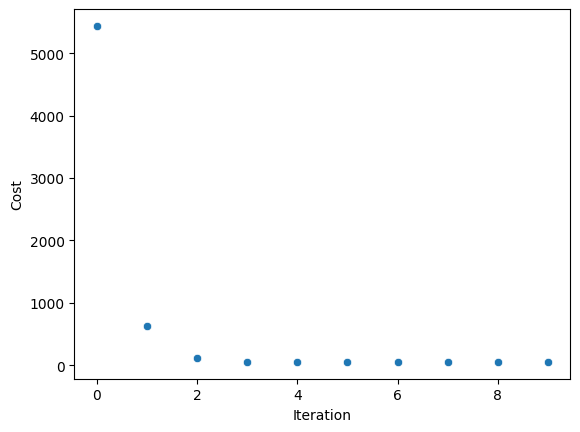

In [79]:
import seaborn as sns

sns.scatterplot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

### Visualizing Linear Regression

In [87]:
list(range(len(param_history)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

IndexError: index 5 is out of bounds for axis 0 with size 5

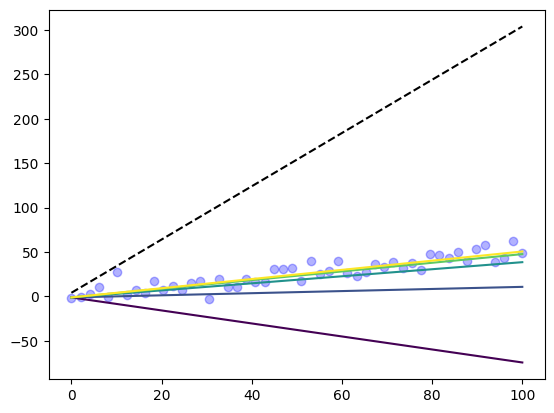

In [88]:
# Setup Plot
plt.scatter(x_data, y_data, color='blue', alpha=0.3, label='Data')

# Plot True Line
plt.plot(x_data, 4 + 3*x_data, 'k--', label='True Line')

# Plot Training Steps
# history contains (m, b) tuples from the training loop
colors = plt.cm.viridis(np.linspace(0, 1, 5))
step_indices = list(range(len(param_history)))

for idx, step_idx in enumerate(step_indices):
    m_curr, b_curr = param_history[step_idx]
    plt.plot(x_data, m_curr * x_data + b_curr, color=colors[idx],
             label=f'Step {step_idx+1}')

plt.legend()

## Gradient Descent with Momentum

In [101]:
x_data

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

In [104]:
m, b = start_params
y_pred = m * x_data + b

print(y.shape)

(-2/n) * np.sum(x_data * (y_data - y_pred))

(500,)


np.float64(7726.710294382246)

In [105]:
num_params = 2 # For simple linear regression, y = mx + b, this is 2

start_params = np.random.normal(0, 1, num_params)


def grad_func(x_data, y_data, start_params):
    m, b = start_params
    y_pred = m * x_data + b
    dm = (-2/n) * np.sum(x_data * (y_data - y_pred))
    db = (-2/n) * np.sum(y_data - y_pred)
    grad = np.array([dm, db])

    return grad

# start_params = np.random.normal(0, num_params / np.sqrt(len(y_data)), num_params)

def momentum_optimizer(grad_func, start_params, lr=0.01, gamma=0.9, steps=100):
    params = np.array(start_params)
    velocity = np.zeros_like(params)

    for _ in range(steps):
        grad = grad_func(x_data, y_data, start_params)

        # 1. Update Velocity (History + Current Gradient)
        velocity = gamma * velocity + lr * grad

        # 2. Update Parameters
        params = params - velocity

    return params

In [106]:
momentum_optimizer(grad_func, start_params, lr=0.01, gamma=0.9, steps=10)

array([20078.38993349,   297.73114714])